In [1]:
from ardca import *

In [2]:
pf = "PF00014"
save_dir = "models"
file_path=f"../data/{pf}.fasta.gz"

In [3]:

version = 1

training_rowgap = TrainState(
    file_path=file_path,
    save_dir=save_dir,
    pf = pf,
    version=version,
    lambda_h=1e-6,
    lambda_J=1e-4,
    max_gap_fraction=1,
    max_col_gap_fraction=1,
    identity_thresh=0.8,
    val_frac=0.1,
    max_iters=200,
    optimizer="adam",
    seed=42,
    device="cpu"
)

In [4]:
model, history, msa_data, tt = main_training_pipeline(training_rowgap)
print(f"Training completed in {tt:.2f} seconds")

Loading MSA data...
MSA shape: (13600, 53)
Effective sequences: 4248.8
Sequence length: 53
Alphabet size: 21
Training ArDCA model...
Evaluating model...
Final train NLL: 0.4661
Final val NLL: 0.5677
Final val perplexity: 1.7643
Model saved to models/ardca_PF00014_v1.pt
Training history saved to models/training_history_PF00014_v1.json
Training completed in 426.47 seconds


In [5]:
version = 2

training_rowgap = TrainState(
    file_path=file_path,
    save_dir="./models",
    pf = pf,
    version=version,
    lambda_h=1e-6,
    lambda_J=1e-4,
    max_gap_fraction=0.1,
    max_col_gap_fraction=1,
    identity_thresh=0.8,
    val_frac=0.1,
    max_iters=200,
    optimizer="adam",
    seed=42,
    device="cpu"
)

In [6]:
model, history, msa_data, tt = main_training_pipeline(training_rowgap)
print(f"Training completed in {tt:.2f} seconds")

Loading MSA data...
MSA shape: (13376, 53)
Effective sequences: 4145.4
Sequence length: 53
Alphabet size: 21
Training ArDCA model...
Evaluating model...
Final train NLL: 0.4685
Final val NLL: 0.4851
Final val perplexity: 1.6244
Model saved to ./models/ardca_PF00014_v2.pt
Training history saved to ./models/training_history_PF00014_v2.json
Training completed in 401.74 seconds


In [7]:
version = 3

training_rowgap = TrainState(
    file_path=file_path,
    save_dir="./models",
    pf = pf,
    version=version,
    lambda_h=1e-6,
    lambda_J=1e-4,
    max_gap_fraction=0.05,
    max_col_gap_fraction=1,
    identity_thresh=0.8,
    val_frac=0.1,
    max_iters=200,
    optimizer="adam",
    seed=42,
    device="cpu"
)

In [8]:
model, history, msa_data, tt = main_training_pipeline(training_rowgap)

print(f"Training completed in {tt:.2f} seconds")

Loading MSA data...
MSA shape: (12784, 53)
Effective sequences: 3876.5
Sequence length: 53
Alphabet size: 21
Training ArDCA model...
Evaluating model...
Final train NLL: 0.4465
Final val NLL: 0.5372
Final val perplexity: 1.7113
Model saved to ./models/ardca_PF00014_v3.pt
Training history saved to ./models/training_history_PF00014_v3.json
Training completed in 370.27 seconds


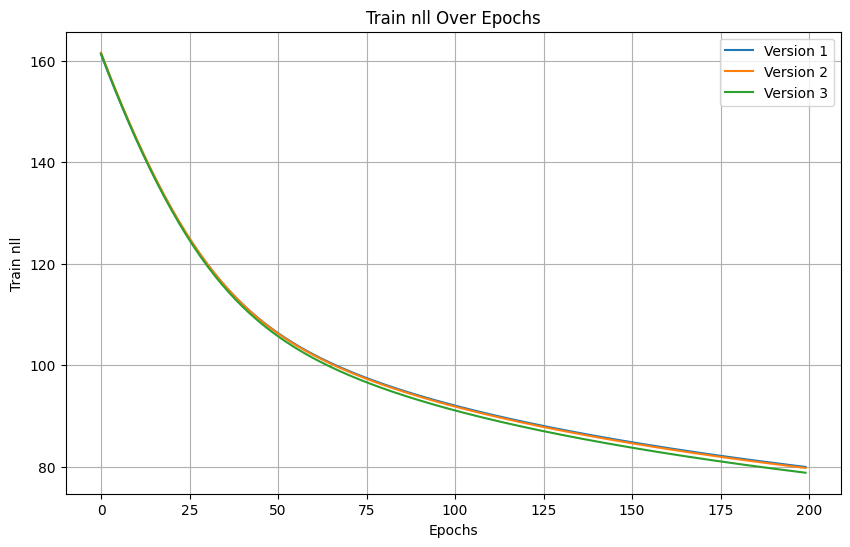

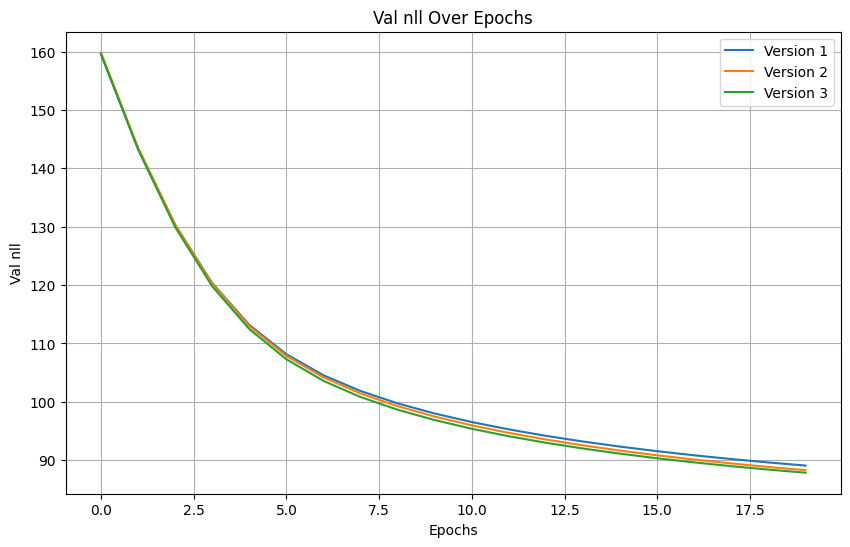

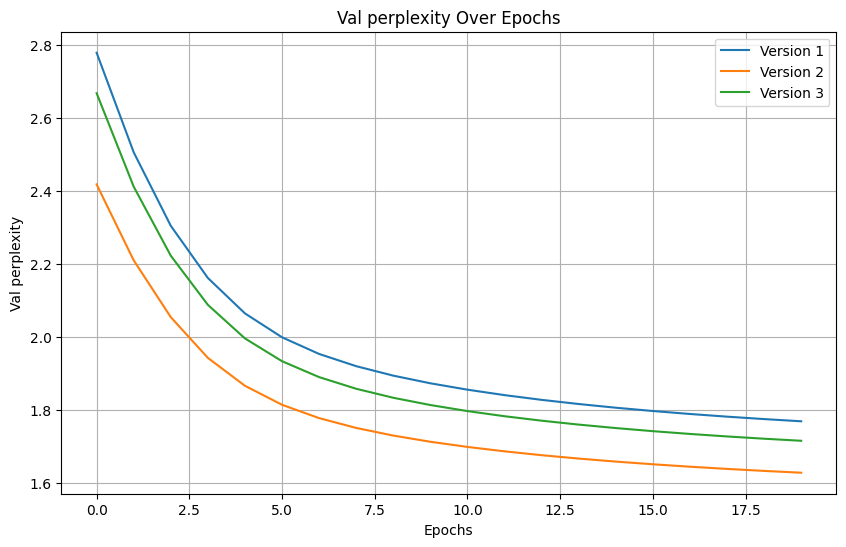

In [9]:
# Versions to compare
versions = [1, 2, 3]

# Load histories
histories = load_all_histories(save_dir, pf, versions)

# Plot training loss
plot_training_behavior(histories, metric="train_nll")
plot_training_behavior(histories, metric="val_nll")

# Plot validation perplexity
plot_training_behavior(histories, metric="val_perplexity")